Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

# Exercise Sheet 03: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 5th, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

# Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Eigenvectors and eigenvalues may be less familiar, so this may be a good time to look them up again (you will only need the basic concepts, you do not have to know how to actually compute them for this class). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

## a) Eigenvectors and eigenvalues

What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

## b) Characteristic polynomial

What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

## c) Spectrum

What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

## d) Numpy/Scipy [bonus task]

Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [11]:
# YOUR CODE HERE

## Assignment 1: p-norm (6 points)

A very well known norm is the euclidean norm. However, it is not the only norm: It is in fact just one of many p-norms where $p = 2$. In this assignment you will take a look at other p-norms and see how they behave.

**(a)** Implement a function `pnorm` which expects a vector $x \in \mathcal{R}^n$ and a scalar $p \geq 1, p \in \mathcal{R}$ and returns the p-norm of $x$ which is defined as:

$$||x||_p = \left(\sum\limits_{i=1}^n |x_i|^p \right)^{\frac{1}{p}}$$

*Note:* Even though the norm is only defined for $p \geq 1$, values $0 < p < 1$ are still interesting. In that case we can not talk about a norm anymore, as the triangle inequality ($||a|| + ||b|| \geq ||a + b||$) does not hold. We will still take a look at some of these values, so your function should handle them as well.

In [12]:
import numpy as np
import math

def pnorm(x, p):
    """
    Calculates the p-norm of x.
    
    Args:
        x (array): the vector for which the norm is to be computed.
        p (float): the p-value (a positive real number).
        
    Returns:
        The p-norm of x.
    """
    # if x consists of several entries
    try:
        x = [abs(i)**p for i in x]

    # x is just a single entry
    except: 
        x = abs(x)**p

    result = None
    
    # if x consists of several entries
    try: 
        sum_part = sum(x)
        
     # x is just a single entry
    except:
        sum_part = x

    result = sum_part**(1/p)

    return result

In [13]:
# Epsilon: Account for rounding erros
epsilon = 1e-8
assert abs(pnorm(1, 2)      - 1          ) < epsilon, "pnorm is incorrect for x = 1, p = 2"
assert abs(pnorm(2, 2)      - 2          ) < epsilon, "pnorm is incorrect for x = 2, p = 2"
assert abs(pnorm([2, 1], 2) - np.sqrt(5) ) < epsilon, "pnorm is incorrect for x = [2, 1], p = 2" 
assert abs(pnorm(2, 0.5)    - 2          ) < epsilon, "pnorm is incorrect for x = 2, p = 0.5"

**(b)** Implement another function `pdist` which expects two vectors $x_0 \in \mathcal{R}^n, x_1 \in \mathcal{R}^n$ and a scalar $p \geq 1, p \in \mathcal{R}$ and returns the distance between $x_0$ and $x_1$ on the p-norm defined by $p$. Again handle $0 < p < 1$ as well.

Notes from prctice: norm(p1 - p2) 

In [14]:
import numpy as np

def pdist(x0, x1, p):
    """
    Calculates the distance between x0 and x1
    using the p-norm.
    
    Arguments:
        x0 (array): the first vector.
        x1 (array): the second vector.
        p (float): the p-value (a positive real number).
        
    Returns:
        The p-distance between x0 and x1.
    """
    result = None

    # x0, x1 are both single entries
    try:
        x = abs(x0 - x1)

    # x0 and / or x1 are not single entries
    except:
        # convert both to lists
        if not isinstance(x0, list):
            x0 = list(x0)
        if not isinstance(x1, list):
            x1 = list(x1)
        
        x = [abs(i - j) for i, j in zip(x0, x1)]
    
    result = pnorm(x, p)
    
    return result

In [15]:
# Epsilon: Account for rounding erros
epsilon = 1e-8
assert abs(pdist(1, 2, 2)           - 1          ) < epsilon , "pdist is incorrect for x0 = 1, x1 = 2, p = 2"
assert abs(pdist(2, 5, 2)           - 3          ) < epsilon , "pdist is incorrect for x0 = 2, x1 = 5, p = 2"
assert abs(pdist([2, 1], [1, 2], 2) - np.sqrt(2) ) < epsilon , "pdist is incorrect for x0 = [2, 1], x1 = [1, 2], p = 2" 
assert abs(pdist([2, 1], [0, 0], 2) - np.sqrt(5) ) < epsilon , "pdist is incorrect for x0 = [2, 1], x1 = [0, 0], p = 2" 
assert abs(pdist(2, 0, 0.5)         - 2          ) < epsilon , "pdist is incorrect for x0 = 2, x1 = 0, p = 0.5"

**(c)** Now we will compare some different p-norms. Below is part of a code to plot data in nice scatter plots. 

Your task is to calculate the data to plot. The variable `data` is currently simply filled with zeros. Instead, fill it as follows:

- Use the function `np.linspace()` to create a vector of `50` evenly distributed values between `-100` and `100` (inclusively).
- Fill `data`: Data is basically the cartesian product of the vector you created before with itself filled up with each value's norm. It should have 2500 rows. Each of the 2500 rows should contain `[x, y, d]`, where `x` is the x coordinate and `y` the y coordinate of a point, and `d` the p-norm of `(x, y)`. Use either `pnorm` or `pdist` to calculate `d`.
- Normalize the data in `data[:,2]` (i.e. all d-values) so that they are between 0 and 1.

Run your code and take a look at your results. Darker colors mean that a value is further away from the center (0, 0) according to the p-norm used.

*Hint:* To give you an idea of how `data` should look like, here is an example for three evenly distributed values between `-1` and `1` and a p-norm with `p = 2`.

Before normalization of the d-column:

```python
data = np.array([[-1.         -1.          1.41421356]
                 [-1.          0.          1.        ]
                 [-1.          1.          1.41421356]
                 [ 0.         -1.          1.        ]
                 [ 0.          0.          0.        ]
                 [ 0.          1.          1.        ]
                 [ 1.         -1.          1.41421356]
                 [ 1.          0.          1.        ]
                 [ 1.          1.          1.41421356]])
```

After normalization of the d-column:

```python
data = np.array([[-1.         -1.          1.        ]
                 [-1.          0.          0.70710678]
                 [-1.          1.          1.        ]
                 [ 0.         -1.          0.70710678]
                 [ 0.          0.          0.        ]
                 [ 0.          1.          0.70710678]
                 [ 1.         -1.          1.        ]
                 [ 1.          0.          0.70710678]
                 [ 1.          1.          1.        ]])
```

practice note: color point according to distance to origin (as calc by norm) --> i.e. euclidean: forms a circle for pts w/ same distance

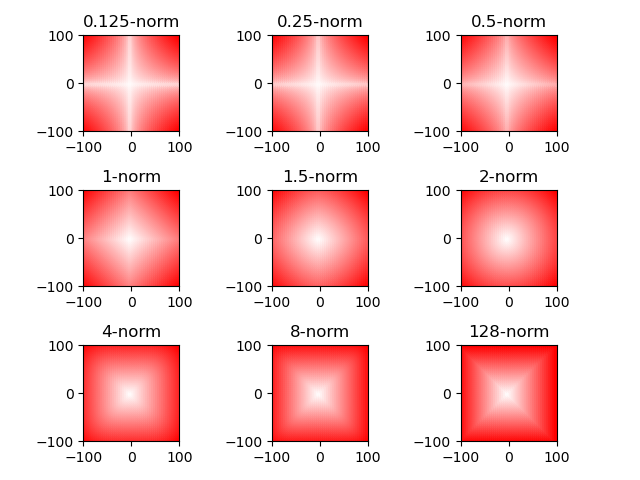

In [16]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter
import itertools

color = ColorConverter()
figure_norms = plt.figure('p-norm comparison')

# create the linspace vector
ls = np.linspace(-100, 100, num = 50)

assert len(ls) == 50 , 'ls should be of length 50.'
assert (min(ls), max(ls)) == (-100, 100) , 'ls should range from -100 to 100, inclusively.'

for i, p in enumerate([1/8, 1/4, 1/2, 1, 1.5, 2, 4, 8, 128]):

    # create cartesian product of the vector with itself 
    cartesian_numbers = [elem for elem in itertools.product(ls, ls)]
    
    # Create a numpy array containing zeros.
    data = np.zeros((2500, 3))
    
    # fill array with x, y, pnorm(x,y) 
    for j, elem in enumerate(cartesian_numbers):
        data[j] = [elem[0], elem[1], pnorm((elem[0], elem[1]), p)]

    
    # normalize by dividing each value by the maximum value in the array
    d_max = np.max(data[:, 2])
    data[:, 2] = [elem / d_max for elem in data[:, 2]]

    assert data[100,2]>0.9 and data[100,2]<1, "Wrong result for p norm, make sure you use NORM and not pdist!"
    assert all(data[:,2] <= 1), 'The third column should be normalized.'

    # Plot the data.
    colors = [color.to_rgb((1, 1-a, 1-a)) for a in data[:,2]]
    a = plt.subplot(3, 3, i + 1)
    plt.scatter(data[:,0], data[:,1], marker='.', color=colors)
    a.set_ylim([-100, 100])
    a.set_xlim([-100, 100])
    a.set_title('{:.3g}-norm'.format(p))
    a.set_aspect('equal')
    plt.tight_layout()
    figure_norms.canvas.draw()

**(d)** In the first parts of this exercise we have used the fact that every $p$-norm induces an associated metric by setting $d_p(x,y):=\|x-y\|_p$ for $x,y\in\mathcal{R}^{n}$.  Show that for $p\ge 1$ this function $d_p$ indeed fulfills the conditions listed on ML-04 slide 39. What problems occur for $p<1$?

Hint: start with a specific case, e.g. the Euclidean metric $p=2$ for a low dimension $n$ and then generalize your arguments to other values of $n$ and $p$.

practice note: d(x,y) == d(y, x); d(x,y) >= 0; d(x,x) == 0 --> if d(x,y) == 0 ==> y = x; triangle thingy (if go from x,y directly is shorter always than going from x - z - y): d(x, z) + d(z,y) >= d(x, y);



proof for conditions listed on ML-04 slide 39:
![image](ex1d1.jpg)
![image](ex1d2.jpg)
![image](ex1d3.jpg)
![image](ex1d4.jpg)

Problems with p<1:
![image](ex1d5.jpg)
![image](ex1d6.jpg)

# Assignment 2: Distance Measures for Clusters (4 points)

## a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

Distances, while originally motivated by geometry, are in ML a measurement for (semantic) similarity. While distances between points can give you information about the relations between single datapoints, there is a multitude of distinct cluster distances. For example the minimum and maximum cluster distances calculate respectively the smallest and the greatest possible distance between two points from different clusters. Another useful measurement is the intracluster distance, which determines the similarity between all datapoints within one cluster. Since clusters are made up from single datapoints, point distances are necessary to calculate cluster distances.


## b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have? --> "e.g. think of situations where you may able to apply 1 but nothe the other"
* What is their computational complexity (use the [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation))? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

mean distance:
- works by calculating the mean for the distances of each pair of points between the clusters
- requires only the distances between datapoints
- complexity of O(n^2)

centroid distance:
- works by calculating the distance between the centroids of the clusters
- requires not only distances but also the data attribute values to be numerical, since the centroid has to be determined first
- complexity of O(n) 

example of numerical clusters:
a)  cluster 1: (-1,0), (0,0)
    cluster 2: (1,0), (2,0)
mean distance = 1/4 * (sqrt((-1-1)^2 + 0^2) + sqrt((-1-2)^2 + 0^2) + sqrt((0-1)^2 + 0^2) + sqrt((0-2)^2 + 0^2)) = 1/4 * (2 + 3 + 1 + 2) = 2
centroid distance: centroids c1 = (-0.5,0), c2 = (1.5,0), distance = sqrt((-0.5-1.5)^2 + 0^2) = sqrt(2^2) = 2 

b)  cluster 1: (1,1), (1,3)
    cluster 2: (0,0), (-2,-2)
mean distance = 1/4 * (sqrt((1-0)^2+(1-0)^2) + sqrt((1--2)^2 + (1--2)^2) + sqrt((1-0)^2 + (3-0)^2) + sqrt((1--2)^2 + (3--2)^2)) ≈ 3.663
centroid distance: centroids c1 = (1,2), c2 = (-1,-1), distance = sqrt((1--1)^2 + (2--1)^2) ≈ 3.606


## c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [17]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    
    sum = 0
    counter = 0

    # sum up the distances between each pair of datapoints between the clusters
    for i, ci in enumerate(cluster1):
        for j, cj in enumerate(cluster2):
            sum = sum + pdist(ci, cj, p = 2)
            counter = counter + 1              # keeps track on how many distances were summed up in total
    
    # mean distance = sum of distances/ number of distances 
    result = sum/ counter 

    return result
    

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

d_mean(x,y)

epsilon = 1e-3
assert abs(d_mean(x, y) - 22.297) < epsilon, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [18]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    
    # computes the centroids by taking the mean across each dimension from the cluster
    centroid1 = np.mean(cluster1, axis = 0)
    centroid2 = np.mean(cluster2, axis = 0)

    # returns distance between the centroids
    return pdist(centroid1, centroid2, p = 2)

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

epsilon = 1e-3
assert abs(d_centroid(x, y) - 20.785) < epsilon, "Result is not correct: {}".format(d_centroid(x, y))
assert abs(d_centroid(z, w) - 55.069) < epsilon, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 # Assignment 3: Hierarchical Clustering (5 points)
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

## a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

![image](ex3a1.jpg)
![image](ex3a2.jpg)

## b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation. Then apply the strategy to obtain a hierarchical clustering, that is iteratively split clusters until all clusters are singletons.

![image](ex3b1.jpg)
![image](ex3b2.jpg)

## c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [19]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

Single Linkage Clustering:
Label:   10,  Occurence:   71
Label:   48,  Occurence:    1
Label:   62,  Occurence:   75
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1
Complete Linkage Clustering:
Label:   10,  Occurence:   42
Label:   15,  Occurence:   40
Label:  104,  Occurence:   29
Label:  118,  Occurence:   37
Label:  136,  Occurence:   27


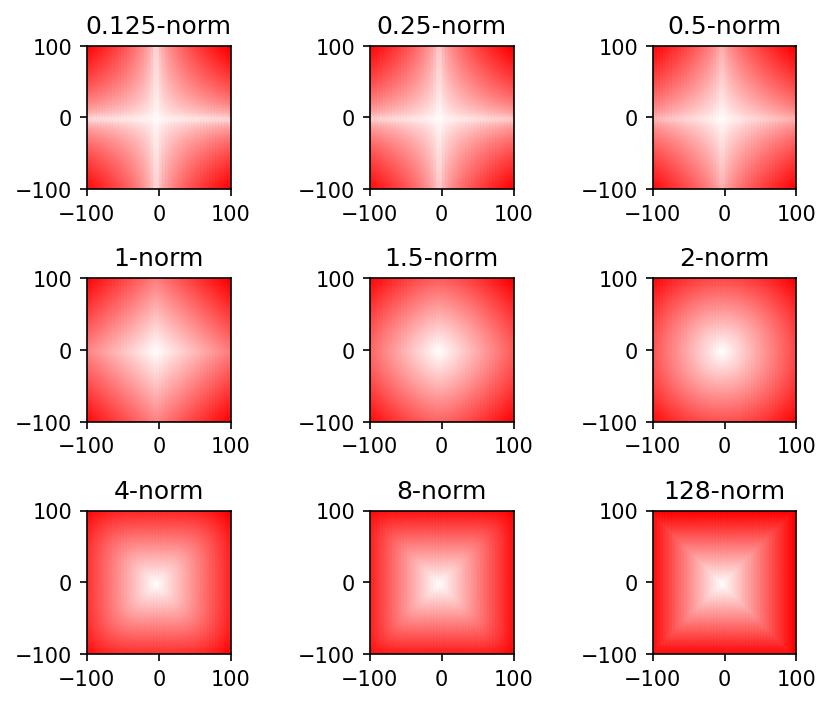

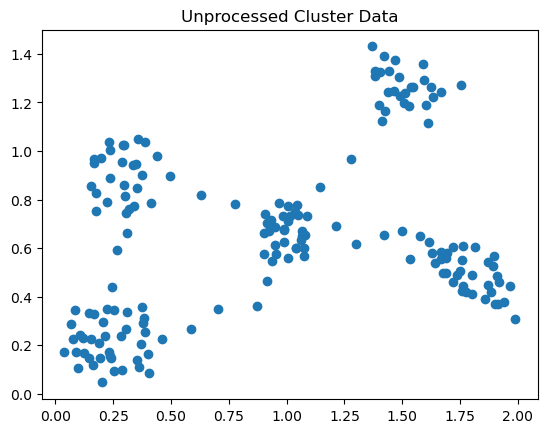

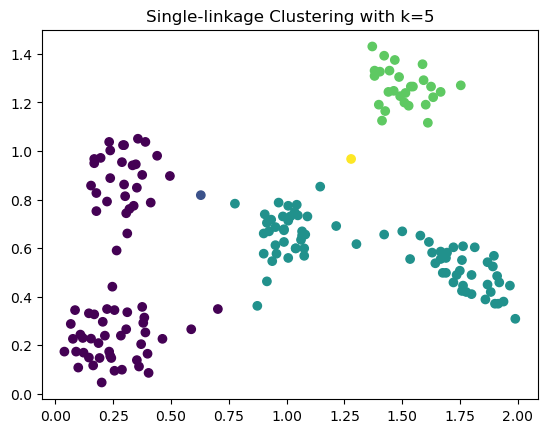

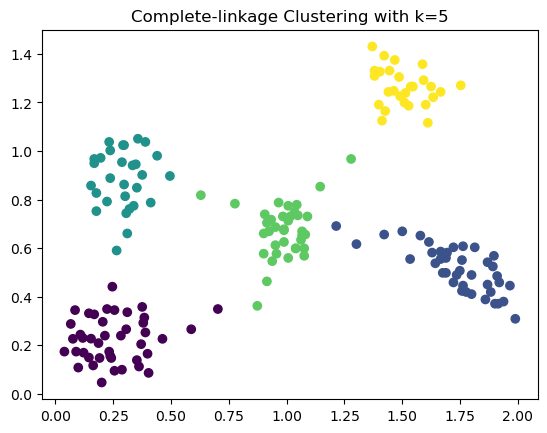

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
# Print the unqiue labels and their occurence
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
# Replace labels by continuous values starting from 1 for discernible colors in plot
labels = np.arange(1,unique.size+1)[inverse]
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()


# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()

# Test different parameters above
# YOUR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

Single linkage clustering employs the minimum cluster distance, while complete linkage clustering employs maximum cluster distance. As a consequence single linkage clustering tends to chaining (i.e. forms more chains between data points), while complete linkage clustering prefers compact clusters. Resulting from the chaining is that the distribution of clusters in the single linkage plot is very weird and unbalanced. Some datapoints which appear as if they should form a cluster are combined into one, leading to slim but long cluster shapes. Additionally, to meet the pre-set requirement of k=5 clusters, in two instances only 1 single datapoint was assigned to a cluster. In contrast, complete linkage clustering provides compact clusters which roughly follow the density of the data. I.e. high density areas are assigned a cluster each, while the remaining spread out data is assigned to the nearest cluster. No high density areas are assigned the same cluster and all clusters have a "reasonable" amount of data points. Given the singleton clusters, we would say that single linkage clustering provides a less good solution for this dataset. Overall complete linkage clustering appears to perform better here.